In [5]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch04 tensorflow v1 feat.스케일조정</font>

# 1. tensorflow v2.xx에서 v1 사용하기

In [4]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## tensorflow

- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [6]:
# tensor = data(상수, 변수)와 연산

node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [7]:
# 간단한 연산 tensor 그래프

node1 = tf.constant(10, dtype = tf.float16)
node2 = tf.constant(20, dtype = tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [8]:
# 타입 변경

node1 = tf.constant(np.array([1, 2, 3]), dtype = tf.int16)
node2 = tf.cast(node1, dtype = tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [9]:
# 평균값 계산 : tf.reduce_mean()

data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [10]:
# 랜덤값을 갖는 tensor

a = tf.random_normal([2])  # 평균이 0, 표준편차가 1인 난수 실수 2개 (정규분포를 이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([ 0.4528369 , -0.82224137], dtype=float32),
 array([-0.8942852], dtype=float32)]

In [11]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # w변수의 난수 초기화
sess.run(w)

array([0.52946633], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현

## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [12]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])

# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name = 'weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Hypothesis : 예측값
H = W * x + b

#cost function(손실함수 = mse; 최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()

# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())

# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0 :
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:14.129585266113281, W:[-0.21478081], b:[0.23801649]
200번째 cost:0.002001651795580983, W:[1.0518376], b:[0.882161]
400번째 cost:0.0007643263670615852, W:[1.0320325], b:[0.9271826]
600번째 cost:0.0002918554237112403, W:[1.019794], b:[0.95500344]
800번째 cost:0.00011144302698085085, W:[1.0122315], b:[0.9721951]
1000번째 cost:4.255611929693259e-05, W:[1.0075583], b:[0.982818]
1200번째 cost:1.6250365661107935e-05, W:[1.0046707], b:[0.98938227]
1400번째 cost:6.205576937645674e-06, W:[1.0028863], b:[0.9934387]
1600번째 cost:2.3699885787209496e-06, W:[1.0017838], b:[0.9959453]
1800번째 cost:9.054335237124178e-07, W:[1.0011027], b:[0.9974938]
2000번째 cost:3.462290578681859e-07, W:[1.0006819], b:[0.9984503]
2200번째 cost:1.3251073482933862e-07, W:[1.0004218], b:[0.9990412]
2400번째 cost:5.0818282915088275e-08, W:[1.0002614], b:[0.99940634]
2600번째 cost:1.9510162374558604e-08, W:[1.0001621], b:[0.9996321]
2800번째 cost:7.54177076345286e-09, W:[1.0001009], b:[0.99977136]
3000번째 cost:2.8918332173333283e-09, W:[1.0

In [13]:
# 최종적으로 나온 회귀식 : H = W * x + b

sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [14]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [15]:
def predict(x) :
    return W_[0] * x + b_[0]

In [17]:
input_x = int(input('입력값은? '))
print('예측값은', predict(input_x))

입력값은? 3
예측값은 4.000007212162018


## 2.2 predict를 위한 placeholder이용

- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [18]:
# x = np.array([1, 2, 3])
x = tf.placeholder(tf.float16)
H = 1 * x + 1
sess = tf.Session()
sess.run(H, feed_dict = {x:5})
sess.run(H, feed_dict = {x:np.array([1, 2, 3])})

array([2., 3., 4.], dtype=float16)

In [19]:
# H = 2 * x + 1
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 5000번 학습
for step in range(5001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:x_data,
                                                      y:y_data})
    if step % 200 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:111.7028579711914, W:[0.73836553], b:[0.6004342]
200째 : cost:0.000743099139072001, W:[2.0092704], b:[0.9504495]
400째 : cost:7.308924978133291e-05, W:[2.0029075], b:[0.98445994]
600째 : cost:7.1911103987076785e-06, W:[2.000912], b:[0.99512583]
800째 : cost:7.077183568071632e-07, W:[2.000286], b:[0.9984711]
1000째 : cost:6.968745225321982e-08, W:[2.00009], b:[0.9995203]
1200째 : cost:6.913217109882908e-09, W:[2.0000281], b:[0.99984926]
1400째 : cost:6.809386943196216e-10, W:[2.000009], b:[0.99995244]
1600째 : cost:7.863718703982059e-11, W:[2.000003], b:[0.99998367]
1800째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2000째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2200째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000째 : cost:2.060005464821213

In [20]:
# 예측하기

sess.run(H, feed_dict = {x:5})

array([11.000001], dtype=float32)

In [21]:
sess.run(H, feed_dict = {x:np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현 (scale 조정 X)

In [23]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 5000번 학습
for step in range(3001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:x_data,
                                                      y:y_data})
    if step % 200 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:3383.62548828125, W:[8.127003], b:[0.4002639]
200째 : cost:83.59843444824219, W:[10.219629], b:[-0.7589113]
400째 : cost:83.49296569824219, W:[10.277554], b:[-1.1877984]
600째 : cost:83.4832992553711, W:[10.295097], b:[-1.3177044]
800째 : cost:83.4823989868164, W:[10.300412], b:[-1.3570524]
1000째 : cost:83.48233032226562, W:[10.302022], b:[-1.368972]
1200째 : cost:83.48229217529297, W:[10.302509], b:[-1.372581]
1400째 : cost:83.48231506347656, W:[10.302657], b:[-1.3736746]
1600째 : cost:83.4823226928711, W:[10.302701], b:[-1.374005]
1800째 : cost:83.4822998046875, W:[10.302715], b:[-1.3741046]
2000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]


In [24]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정O)

```
normalization(정규화) : 0~1로 조정 
                    X - Xmin 
    normalization = ──────────── 
                    Xmax - Xmin 
* 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
    
standardization(표준화) : 평균0, 표준편차1로 조정 
                        X - Xmean(평균) 
    standardization = ────────────────── 
                        Xstd(표준편차) 
* 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)
```

In [25]:
# 라이브러리를 쓰지 않고 정규화

x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [26]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)

from sklearn.preprocessing import MinMaxScaler

x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)
# np.column_stack([x_data, y_data])
scaler_x = MinMaxScaler()  # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler()  # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [27]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:scaled_x_data,
                                                      y:scaled_y_data})
    if step % 600 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:3.730938673019409, W:[0.0550406], b:[-1.3805451]
600째 : cost:0.19830942153930664, W:[0.6990157], b:[-0.20816104]
1200째 : cost:0.021038368344306946, W:[0.85553473], b:[0.04745038]
1800째 : cost:0.011744474992156029, W:[0.9014036], b:[0.09888171]
2400째 : cost:0.010957109741866589, W:[0.92110676], b:[0.10539593]
3000째 : cost:0.0106738843023777, W:[0.93372643], b:[0.10251489]
3600째 : cost:0.010475343093276024, W:[0.94369054], b:[0.09809846]
4200째 : cost:0.010326010175049305, W:[0.95212877], b:[0.09383084]
4800째 : cost:0.010213134810328484, W:[0.9594159], b:[0.09002429]
5400째 : cost:0.010127796791493893, W:[0.9657408], b:[0.08669295]
6000째 : cost:0.01006326638162136, W:[0.97123814], b:[0.08379143]
6600째 : cost:0.010014474391937256, W:[0.97601795], b:[0.08126735]
7200째 : cost:0.009977588430047035, W:[0.9801738], b:[0.07907231]
7800째 : cost:0.009949695318937302, W:[0.9837875], b:[0.0771636]
8400째 : cost:0.009928603656589985, W:[0.9869298], b:[0.07550388]
9000째 : cost:0.00991266034543

In [28]:
# 예측 : 모델에 scale 조정된 값으로 예측 → scale 조정된 y값

scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep = '\n')
scaled_output = sess.run(H, feed_dict = {x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep = '\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep = '\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.18020341]
 [0.29118347]]
결과 :
[[19.578714]
 [29.78888 ]]


In [29]:
# x_data들의 예측값

scaled_y_hat = sess.run(H, feed_dict = {x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

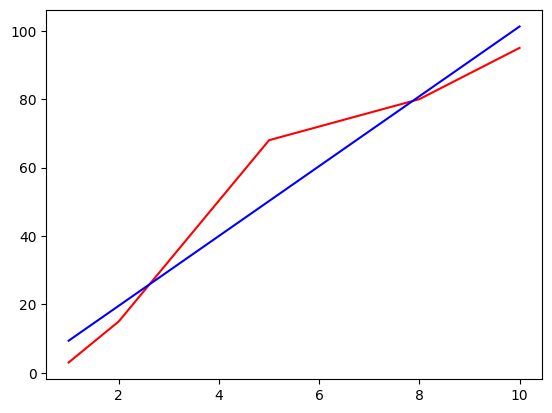

In [31]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')
plt.show()

In [32]:
# 라이브러리를 쓰고 표준화 (StandardScaler 이용)

from sklearn.preprocessing import StandardScaler

x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)

scaler_x = StandardScaler()  # x_data를 표준화할 객체
scaler_y = StandardScaler()  # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [33]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis(예측값)
H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 12000번 학습
for step in range(12001) :
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict = {x:scaled_x_data,
                                                      y:scaled_y_data})
    if step % 600 == 0 :
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.447822242975235, W:[0.4031674], b:[-0.25375637]
600째 : cost:0.09754059463739395, W:[0.798185], b:[-0.07633816]
1200째 : cost:0.06584005057811737, W:[0.91701925], b:[-0.02296499]
1800째 : cost:0.06297115981578827, W:[0.9527683], b:[-0.00690861]
2400째 : cost:0.06271152943372726, W:[0.9635231], b:[-0.00207833]
3000째 : cost:0.06268803775310516, W:[0.96675795], b:[-0.00062522]
3600째 : cost:0.06268591433763504, W:[0.9677311], b:[-0.00018808]
4200째 : cost:0.06268571317195892, W:[0.9680236], b:[-5.6572087e-05]
4800째 : cost:0.06268569827079773, W:[0.9681107], b:[-1.7009983e-05]
5400째 : cost:0.06268568336963654, W:[0.96813506], b:[-5.103752e-06]
6000째 : cost:0.06268569082021713, W:[0.96813506], b:[-1.5166131e-06]
6600째 : cost:0.06268568336963654, W:[0.96813506], b:[-4.3777996e-07]
7200째 : cost:0.06268569082021713, W:[0.96813506], b:[-1.1511764e-07]
7800째 : cost:0.06268569827079773, W:[0.96813506], b:[-2.2060156e-08]
8400째 : cost:0.06268569082021713, W:[0.96813506], b:[1.09310125e-08]
9

In [34]:
# x_data들의 예측값

scaled_y_hat = sess.run(H, feed_dict = {x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

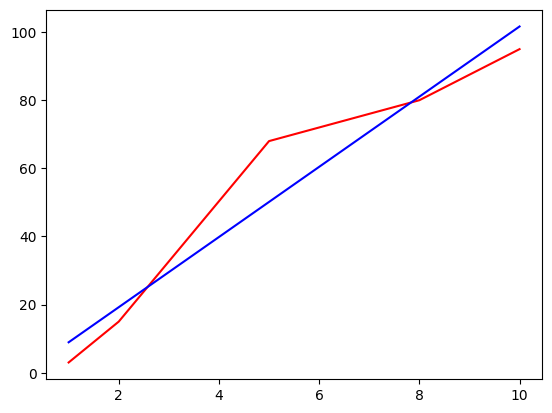

In [35]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')
plt.show()